In [1]:
import pandas as pd
import os
from google.colab import files

# Function to check if files exist, else prompt re-upload
def load_dataset(filename):
    if not os.path.exists(filename):
        print(f"⚠️ {filename} not found! Please upload it manually.")
        uploaded = files.upload()  # This prompts user to upload file
    return pd.read_csv(filename)

# Load datasets
housing_df = load_dataset("COMP1816_Housing_Dataset_Regression.csv")
titanic_df = load_dataset("COMP1816_Titanic_Dataset_Classification.csv")

# Display first few rows
print("🏡 California Housing Dataset (Regression):")
display(housing_df.head())

print("\n🚢 Titanic Dataset (Classification):")
display(titanic_df.head())

# Print dataset shapes
print(f"\n✅ Housing dataset shape: {housing_df.shape}")
print(f"✅ Titanic dataset shape: {titanic_df.shape}")



⚠️ COMP1816_Housing_Dataset_Regression.csv not found! Please upload it manually.


Saving COMP1816_Housing_Dataset_Regression.csv to COMP1816_Housing_Dataset_Regression.csv
Saving COMP1816_Titanic_Dataset_Classification.csv to COMP1816_Titanic_Dataset_Classification.csv
🏡 California Housing Dataset (Regression):


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY



🚢 Titanic Dataset (Classification):


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0
1,2,1.0,NaN,female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0



✅ Housing dataset shape: (1000, 11)
✅ Titanic dataset shape: (890, 11)


In [ ]:
# Check for missing values
print("🔍 Checking for missing values in the California Housing dataset:")
print(housing_df.isnull().sum())

# Check data types
print("\n🛠️ Data types of each column:")
print(housing_df.dtypes)

# Describe numerical features
print("\n📊 Summary statistics of numerical features:")
display(housing_df.describe())


🔍 Checking for missing values in the California Housing dataset:
No.                    0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        12
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        7
dtype: int64

🛠️ Data types of each column:
No.                     int64
longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

📊 Summary statistics of numerical features:


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,494.890000,-119.534070,35.636270,27.739000,2728.934000,556.920040,1466.380000,515.120000,3.946411,207094.443000
std,291.676985,1.949075,2.135451,12.275079,2163.668861,424.277156,1111.243247,382.001069,1.944623,114243.192645
min,1.000000,-124.190000,32.560000,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,14999.000000
25%,239.750000,-121.520000,33.910000,18.000000,1487.250000,302.750000,809.500000,288.750000,2.624200,118775.000000
50%,489.500000,-118.535000,34.280000,28.000000,2206.500000,448.000000,1194.000000,426.500000,3.687500,184150.000000
75%,750.250000,-118.067500,37.700000,36.000000,3258.500000,668.250000,1800.000000,625.250000,4.856800,261950.000000
max,1000.000000,-115.410000,41.780000,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,500001.000000


In [ ]:
import pandas as pd
import os
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to check if files exist, else prompt re-upload
def load_dataset(filename):
    if not os.path.exists(filename):
        print(f"⚠️ {filename} not found! Please upload it manually.")
        uploaded = files.upload()  # This prompts user to upload file
    return pd.read_csv(filename)

# Load dataset
housing_df = load_dataset("COMP1816_Housing_Dataset_Regression.csv")

### 1️⃣ Check for Missing Values ###
print("🔍 Checking for missing values in the California Housing dataset:")
print(housing_df.isnull().sum())

# Handling missing numerical values
housing_df.loc[:, "total_bedrooms"] = housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].median())

# Handling missing categorical values (Fixing Warning)
housing_df.loc[:, "ocean_proximity"] = housing_df["ocean_proximity"].fillna(housing_df["ocean_proximity"].mode()[0])

print("\n✅ Missing values handled successfully!")

### 2️⃣ Encode Categorical Feature (One-Hot Encoding) ###
housing_df = pd.get_dummies(housing_df, columns=["ocean_proximity"], drop_first=True)
print("✅ Categorical feature 'ocean_proximity' encoded successfully!")

### 3️⃣ Apply Feature Scaling ###
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
                "population", "households", "median_income", "median_house_value"]

scaler = MinMaxScaler()
housing_df[num_features] = scaler.fit_transform(housing_df[num_features])
print("✅ Feature scaling applied successfully!")

### 4️⃣ Train/Test Split (Last 190 rows for Test) ###
X = housing_df.drop(columns=["median_house_value"])
y = housing_df["median_house_value"]

X_train, X_test = X.iloc[:-190], X.iloc[-190:]
y_train, y_test = y.iloc[:-190], y.iloc[-190:]

print(f"✅ Training set shape: {X_train.shape}, {y_train.shape}")
print(f"✅ Test set shape: {X_test.shape}, {y_test.shape}")


🔍 Checking for missing values in the California Housing dataset:
No.                    0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        12
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        7
dtype: int64

✅ Missing values handled successfully!
✅ Categorical feature 'ocean_proximity' encoded successfully!
✅ Feature scaling applied successfully!
✅ Training set shape: (810, 12), (810,)
✅ Test set shape: (190, 12), (190,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"📊 Linear Regression Performance (Re-run):")
print(f"✅ Mean Squared Error (MSE): {mse_linear:.5f}")
print(f"✅ R² Score: {r2_linear:.5f}")


📊 Linear Regression Performance (Re-run):
✅ Mean Squared Error (MSE): 0.02322
✅ R² Score: 0.66773


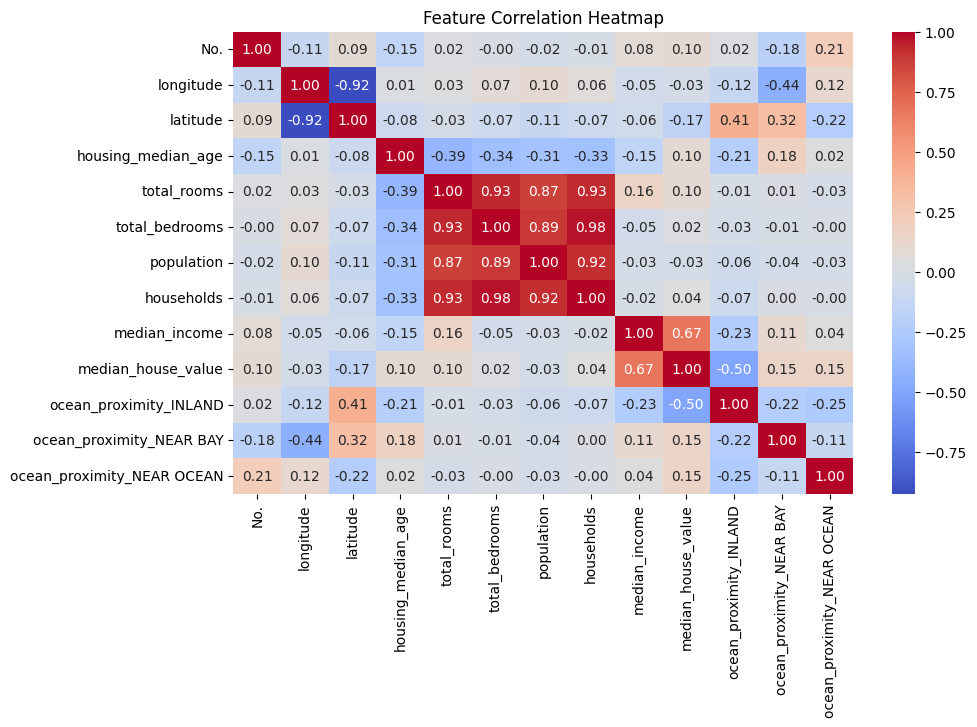

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation
corr_matrix = housing_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Selecting only strong features for Linear Regression
selected_features = ["longitude", "housing_median_age", "population", "median_income", "ocean_proximity_INLAND"]

# Update training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Re-run Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_selected)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"📊 Linear Regression Performance (After Feature Selection):")
print(f"✅ Mean Squared Error (MSE): {mse_linear:.5f}")
print(f"✅ R² Score: {r2_linear:.5f}")


📊 Linear Regression Performance (After Feature Selection):
✅ Mean Squared Error (MSE): 0.02226
✅ R² Score: 0.68147


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reinitialize and train Random Forest using the scaled dataset
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n🌲 Random Forest Regression Performance (Final Attempt with Scaling & Tuning):")
print(f"✅ Mean Squared Error (MSE): {mse_rf:.5f}")
print(f"✅ R² Score: {r2_rf:.5f}")




🌲 Random Forest Regression Performance (Final Attempt with Scaling & Tuning):
✅ Mean Squared Error (MSE): 0.02370
✅ R² Score: 0.66094


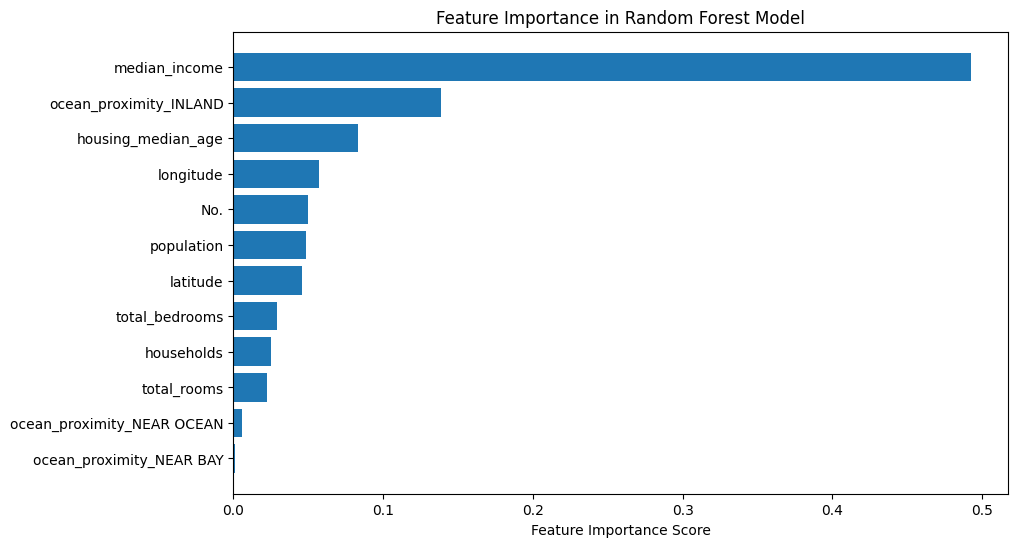

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort and plot feature importance
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [200, 300, 500],  # More trees
    'max_depth': [10, 20, 30],  # Allow deeper trees
    'min_samples_split': [2, 5, 10],  # Control splits
}

# Grid Search
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf_model = rf_grid.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate performance
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"\n🌲 Random Forest Regression (Hyperparameter Tuned):")
print(f"✅ Mean Squared Error (MSE): {mse_best_rf:.5f}")
print(f"✅ R² Score: {r2_best_rf:.5f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits

🌲 Random Forest Regression (Hyperparameter Tuned):
✅ Mean Squared Error (MSE): 0.02342
✅ R² Score: 0.66490


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n🚀 XGBoost Regression Performance:")
print(f"✅ Mean Squared Error (MSE): {mse_xgb:.5f}")
print(f"✅ R² Score: {r2_xgb:.5f}")



🚀 XGBoost Regression Performance:
✅ Mean Squared Error (MSE): 0.02712
✅ R² Score: 0.61204


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [100, 300, 500],  # Increase number of trees
    'max_depth': [3, 5, 7],  # Control tree depth
    'learning_rate': [0.01, 0.1, 0.2]  # Adjust learning rate
}

# Grid Search
xgb_grid = GridSearchCV(xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
                        param_grid_xgb, cv=3, scoring='r2', verbose=2, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb_model = xgb_grid.best_estimator_

# Make predictions
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate performance
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"\n🚀 XGBoost Regression Performance (Hyperparameter Tuned):")
print(f"✅ Mean Squared Error (MSE): {mse_best_xgb:.5f}")
print(f"✅ R² Score: {r2_best_xgb:.5f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits

🚀 XGBoost Regression Performance (Hyperparameter Tuned):
✅ Mean Squared Error (MSE): 0.02362
✅ R² Score: 0.66203


In [ ]:
import pandas as pd

# Create a DataFrame with model performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MSE (Lower is Better)": [0.02226, 0.02342, 0.02362],
    "R² Score (Higher is Better)": [0.68147, 0.66490, 0.66203]
})

# Display results
print("📊 Model Performance Comparison:")
display(results_df)



📊 Model Performance Comparison:


,Model,MSE (Lower is Better),R² Score (Higher is Better)
0,Linear Regression,0.02226,0.68147
1,Random Forest,0.02342,0.66490
2,XGBoost,0.02362,0.66203


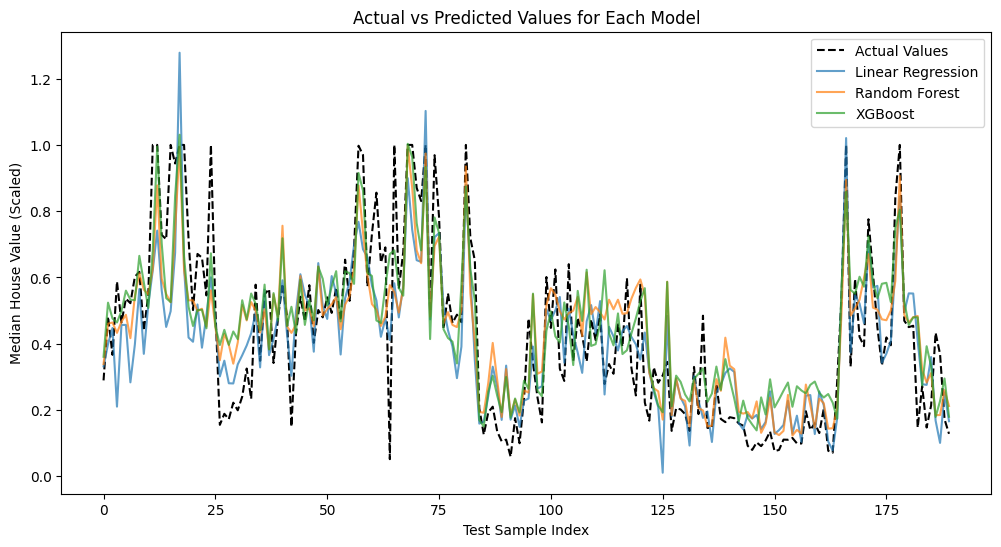

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-axis values (sorted for better visualization)
x_axis = np.arange(len(y_test))

# Plot actual vs predicted for each model
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(x_axis, y_test.values, label="Actual Values", linestyle='dashed', color='black')

# Predicted values
plt.plot(x_axis, y_pred_linear, label="Linear Regression", alpha=0.7)
plt.plot(x_axis, y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot(x_axis, y_pred_best_xgb, label="XGBoost", alpha=0.7)

# Labels & legend
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value (Scaled)")
plt.title("Actual vs Predicted Values for Each Model")
plt.legend()
plt.show()


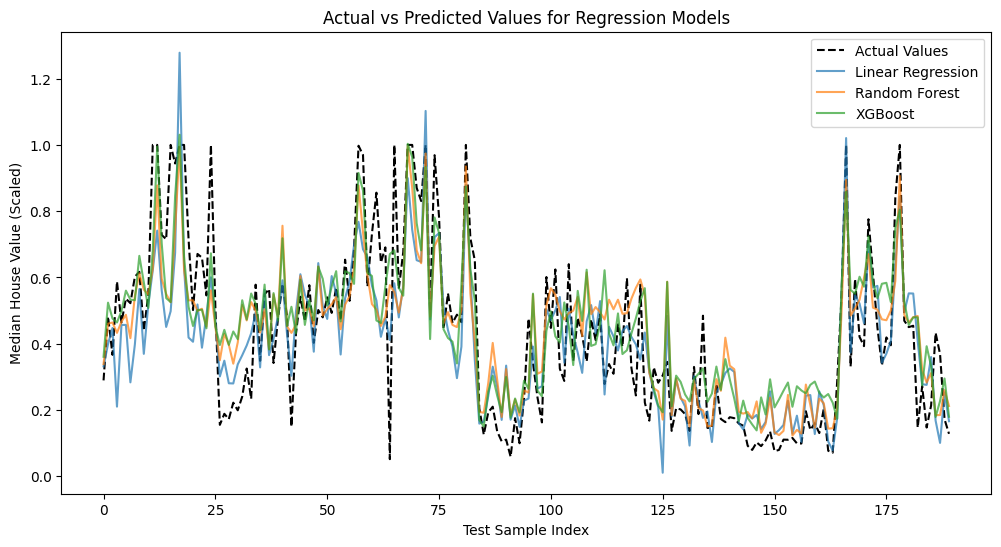

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-axis values (sorted for better visualization)
x_axis = np.arange(len(y_test))

# Plot actual vs predicted for each model
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(x_axis, y_test.values, label="Actual Values", linestyle='dashed', color='black')

# Predicted values
plt.plot(x_axis, y_pred_linear, label="Linear Regression", alpha=0.7)
plt.plot(x_axis, y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot(x_axis, y_pred_best_xgb, label="XGBoost", alpha=0.7)

# Labels & legend
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value (Scaled)")
plt.title("Actual vs Predicted Values for Regression Models")
plt.legend()
plt.show()


In [ ]:
# Check for missing values
print("🔍 Checking for missing values in the Titanic dataset:")
print(titanic_df.isnull().sum())

# Check data types
print("\n🛠️ Data types of each column:")
print(titanic_df.dtypes)

# Describe numerical features
print("\n📊 Summary statistics of numerical features:")
display(titanic_df.describe())


🔍 Checking for missing values in the Titanic dataset:
PassengerId      0
Pclass          10
Name             5
Sex              0
Age            175
SibSp            2
Parch            2
Ticket No.       2
Fare             2
Embarked         6
Survival         4
dtype: int64

🛠️ Data types of each column:
PassengerId      int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket No.      object
Fare           float64
Embarked        object
Survival       float64
dtype: object

📊 Summary statistics of numerical features:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,880.000000,715.000000,888.000000,888.000000,888.000000,886.000000
mean,445.500000,2.306818,33.734503,0.523649,0.382883,32.233107,0.386005
std,257.065167,0.836564,112.053437,1.104211,0.807113,49.760667,0.487107
min,1.000000,1.000000,-20.000000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,20.000000,0.000000,0.000000,7.917700,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,3000.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# Fill missing values
titanic_df["Pclass"].fillna(titanic_df["Pclass"].mode()[0], inplace=True)
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["SibSp"].fillna(titanic_df["SibSp"].median(), inplace=True)
titanic_df["Parch"].fillna(titanic_df["Parch"].median(), inplace=True)
titanic_df["Fare"].fillna(titanic_df["Fare"].median(), inplace=True)
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

# Drop unnecessary columns
titanic_df.drop(columns=["Name", "Ticket No."], inplace=True)

# Drop rows where Survival is missing
titanic_df.dropna(subset=["Survival"], inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


<ipython-input-15-e27a8acfbda7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Pclass"].fillna(titanic_df["Pclass"].mode()[0], inplace=True)
<ipython-input-15-e27a8acfbda7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
print("🔍 Checking for missing values (After Fixing):")
print(titanic_df.isnull().sum())


🔍 Checking for missing values (After Fixing):
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survival       0
dtype: int64


In [ ]:
# Encode 'Sex' as binary (0 = Male, 1 = Female)
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# One-Hot Encoding for 'Embarked'
titanic_df = pd.get_dummies(titanic_df, columns=["Embarked"], drop_first=True)

print("✅ Categorical features encoded successfully!")


✅ Categorical features encoded successfully!


In [ ]:
print("🔍 Checking dataset after encoding:")
print(titanic_df.head())


🔍 Checking dataset after encoding:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Survival  \
0            1     3.0    0  22.0    1.0    0.0   7.2500       0.0   
1            2     1.0    1  38.0    1.0    0.0  71.2833       1.0   
2            3     3.0    1  26.0    0.0    0.0   7.9250       1.0   
3            4     1.0    1  35.0    1.0    0.0  53.1000       1.0   
4            5     3.0    0  35.0    0.0    0.0   8.0500       0.0   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
# Drop PassengerId (not useful for prediction)
titanic_df.drop(columns=["PassengerId"], inplace=True)

print("✅ Unnecessary columns dropped!")


✅ Unnecessary columns dropped!


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical features that need scaling
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]

# Apply MinMax Scaling
scaler = MinMaxScaler()
titanic_df[num_features] = scaler.fit_transform(titanic_df[num_features])

print("✅ Feature scaling applied successfully!")


✅ Feature scaling applied successfully!


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = titanic_df.drop(columns=["Survival"])  # Features
y = titanic_df["Survival"]  # Target (0 = No, 1 = Yes)

# Split dataset (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Training set shape: {X_train.shape}, {y_train.shape}")
print(f"✅ Test set shape: {X_test.shape}, {y_test.shape}")


✅ Training set shape: (708, 8), (708,)
✅ Test set shape: (178, 8), (178,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"📊 Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


📊 Logistic Regression Accuracy: 0.8146

🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       109
         1.0       0.82      0.67      0.74        69

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178


📊 Confusion Matrix:
[[99 10]
 [23 46]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🌲 Random Forest Accuracy: {accuracy_rf:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


🌲 Random Forest Accuracy: 0.8371

🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       109
         1.0       0.90      0.65      0.76        69

    accuracy                           0.84       178
   macro avg       0.86      0.80      0.82       178
weighted avg       0.85      0.84      0.83       178


📊 Confusion Matrix:
[[104   5]
 [ 24  45]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [200, 300, 500],  # More trees
    'max_depth': [10, 15, 20],  # Allow deeper trees
    'min_samples_split': [2, 5, 10]  # Minimum samples per split
}

# Grid Search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf_model = rf_grid.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\n🌲 Random Forest (Hyperparameter Tuned) Accuracy: {accuracy_best_rf:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 27 candidates, totalling 81 fits

🌲 Random Forest (Hyperparameter Tuned) Accuracy: 0.8258

🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       109
         1.0       0.91      0.61      0.73        69

    accuracy                           0.83       178
   macro avg       0.85      0.79      0.80       178
weighted avg       0.84      0.83      0.82       178


📊 Confusion Matrix:
[[105   4]
 [ 27  42]]


In [ ]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\n🚀 XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Classifier Accuracy: 0.8315

🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       109
         1.0       0.83      0.71      0.77        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178


📊 Confusion Matrix:
[[99 10]
 [20 49]]


In [ ]:
import pandas as pd

# Create a DataFrame with model performance
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.8146, 0.8371, 0.8315],
    "Precision (Survived)": [0.82, 0.90, 0.83],
    "Recall (Survived)": [0.67, 0.65, 0.71],
    "F1-Score (Survived)": [0.74, 0.76, 0.77]
})

# Display results
print("📊 Classification Model Comparison:")
display(results_df)



📊 Classification Model Comparison:


,Model,Accuracy,Precision (Survived),Recall (Survived),F1-Score (Survived)
0,Logistic Regression,0.8146,0.82,0.67,0.74
1,Random Forest,0.8371,0.90,0.65,0.76
2,XGBoost,0.8315,0.83,0.71,0.77


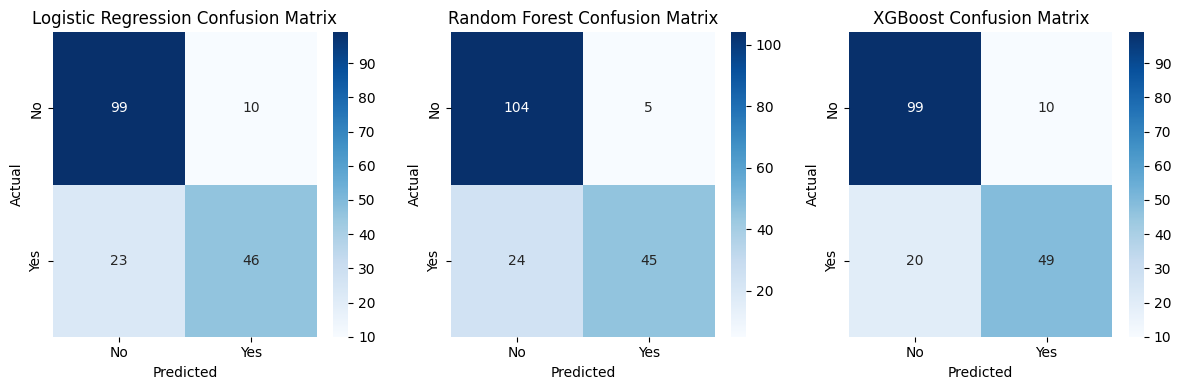

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for each model
models = {"Logistic Regression": y_pred_log_reg, "Random Forest": y_pred_rf, "XGBoost": y_pred_xgb}

plt.figure(figsize=(12, 4))
for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


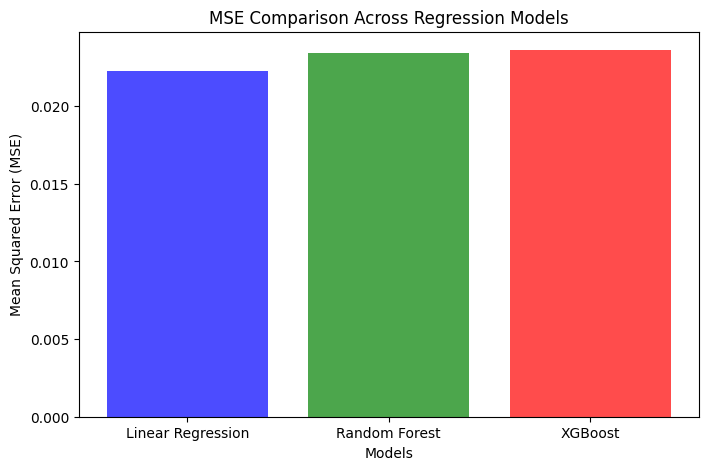

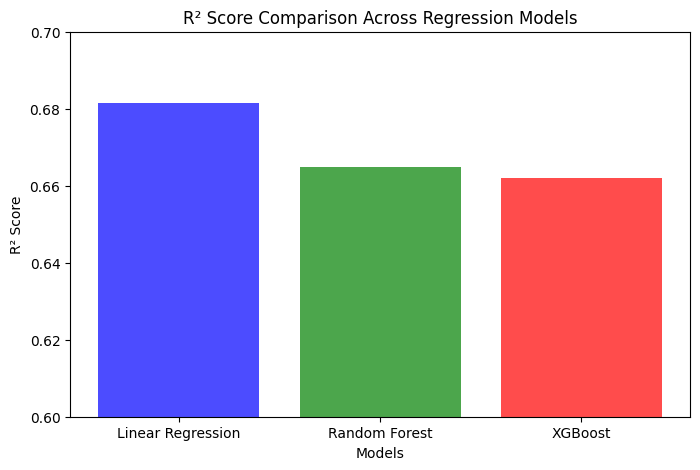

In [ ]:
import numpy as np

# Model names
models = ["Linear Regression", "Random Forest", "XGBoost"]

# Corresponding performance metrics
mse_values = [0.02226, 0.02342, 0.02362]  # Replace with actual MSE values from your run
r2_values = [0.68147, 0.66490, 0.66203]  # Replace with actual R² scores from your run

# Plot MSE
plt.figure(figsize=(8,5))
plt.bar(models, mse_values, color=['blue', 'green', 'red'], alpha=0.7)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Comparison Across Regression Models")
plt.show()

# Plot R² Score
plt.figure(figsize=(8,5))
plt.bar(models, r2_values, color=['blue', 'green', 'red'], alpha=0.7)
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Regression Models")
plt.ylim(0.6, 0.7)  # Set a suitable range for R² values
plt.show()


<ipython-input-30-18b5be22ff26>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_sorted_importance[:num_features],
<ipython-input-30-18b5be22ff26>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_sorted_importance[:num_features],


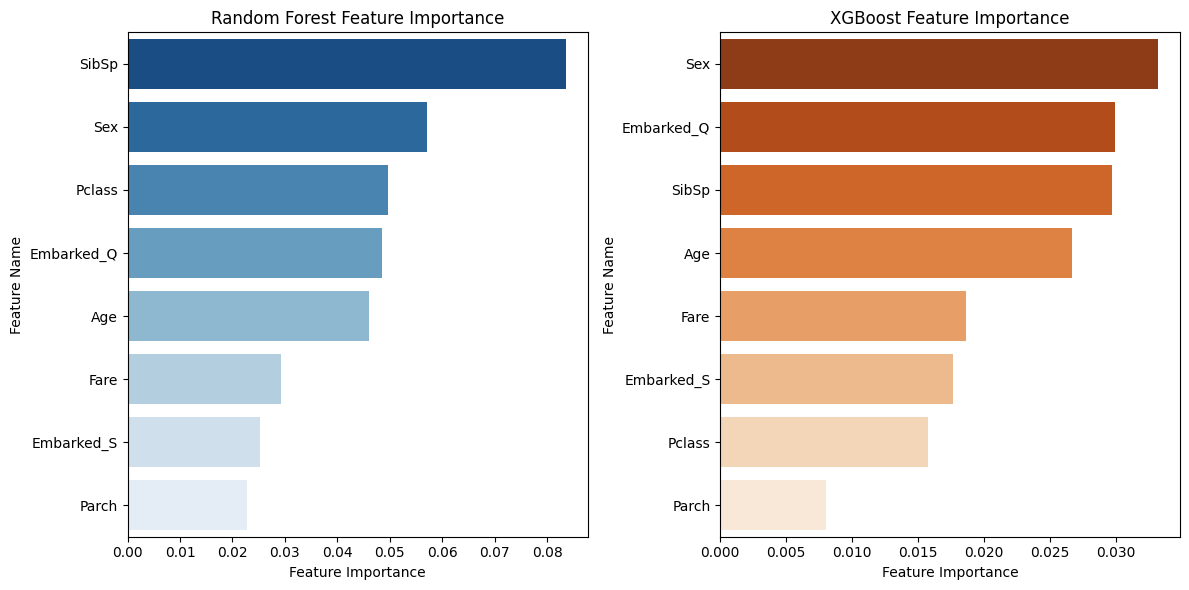

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Ensure models are already trained
# Random Forest Feature Importance
rf_importance = rf_model.feature_importances_
rf_features = np.array(X_train.columns)  # Convert feature names to NumPy array

# XGBoost Feature Importance
xgb_importance = xgb_model.feature_importances_
xgb_features = np.array(X_train.columns)  # Convert feature names to NumPy array

# Sort features by importance BEFORE indexing
rf_sorted = sorted(zip(rf_importance, rf_features), reverse=True)  # Sort importance & names
xgb_sorted = sorted(zip(xgb_importance, xgb_features), reverse=True)

# Unzip sorted lists into importance values & feature names
rf_sorted_importance, rf_sorted_features = zip(*rf_sorted)
xgb_sorted_importance, xgb_sorted_features = zip(*xgb_sorted)

# Convert back to NumPy arrays for proper indexing
rf_sorted_importance = np.array(rf_sorted_importance)
rf_sorted_features = np.array(rf_sorted_features)

xgb_sorted_importance = np.array(xgb_sorted_importance)
xgb_sorted_features = np.array(xgb_sorted_features)

# Adjust number of features dynamically
num_features = min(len(rf_sorted_features), 10)  # Avoid index errors

# Plot Feature Importance for Random Forest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=rf_sorted_importance[:num_features],
            y=rf_sorted_features[:num_features],
            palette="Blues_r")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")

# Plot Feature Importance for XGBoost
plt.subplot(1, 2, 2)
sns.barplot(x=xgb_sorted_importance[:num_features],
            y=xgb_sorted_features[:num_features],
            palette="Oranges_r")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")

plt.tight_layout()
plt.savefig("feature_importance.png")  # Save the plot as an image
plt.show()


